In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [5]:
df=pd.read_csv('usedCars.csv')
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


## Dataset Overview

In [39]:
#Shape of the dataset
print("Dataset Shape: ", df.shape)

#Column information
df.info()

# Statistical Summary
df.describe()

Dataset Shape:  (1064, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1064 non-null   int64  
 1   Company           1064 non-null   object 
 2   Model             1064 non-null   object 
 3   Variant           1064 non-null   object 
 4   FuelType          1063 non-null   object 
 5   Colour            1064 non-null   object 
 6   Kilometer         1064 non-null   int64  
 7   BodyStyle         1064 non-null   object 
 8   TransmissionType  350 non-null    object 
 9   ManufactureDate   1064 non-null   object 
 10  ModelYear         1064 non-null   int64  
 11  CngKit            22 non-null     object 
 12  Price             1064 non-null   object 
 13  Owner             1064 non-null   object 
 14  DealerState       1064 non-null   object 
 15  DealerName        1064 non-null   object 
 16  City           

,Id,Kilometer,ModelYear,Warranty,QualityScore
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,568156.542293,52807.187970,2016.864662,0.738722,7.770207
std,16438.139974,33840.296979,2.996786,0.439538,0.719717
min,525978.000000,101.000000,2003.000000,0.000000,0.000000
25%,555321.500000,32113.500000,2015.000000,0.000000,7.500000
50%,572753.000000,49432.000000,2017.000000,1.000000,7.800000
75%,583072.750000,68828.500000,2019.000000,1.000000,8.100000
max,589122.000000,640000.000000,2023.000000,1.000000,9.400000


In [40]:
df.isnull().sum()

,0
Id,0
Company,0
Model,0
Variant,0
FuelType,1
Colour,0
Kilometer,0
BodyStyle,0
TransmissionType,714
ManufactureDate,0


## Exploratory Data Analysis ( Data Ecploration )

In [41]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print("Numerical Features:", num_cols)
print("Categorical Features:", cat_cols)

Numerical Features: Index(['Id', 'Kilometer', 'ModelYear', 'Warranty', 'QualityScore'], dtype='object')
Categorical Features: Index(['Company', 'Model', 'Variant', 'FuelType', 'Colour', 'BodyStyle',
       'TransmissionType', 'ManufactureDate', 'CngKit', 'Price', 'Owner',
       'DealerState', 'DealerName', 'City'],
      dtype='object')


# Numerical Feature Distributions

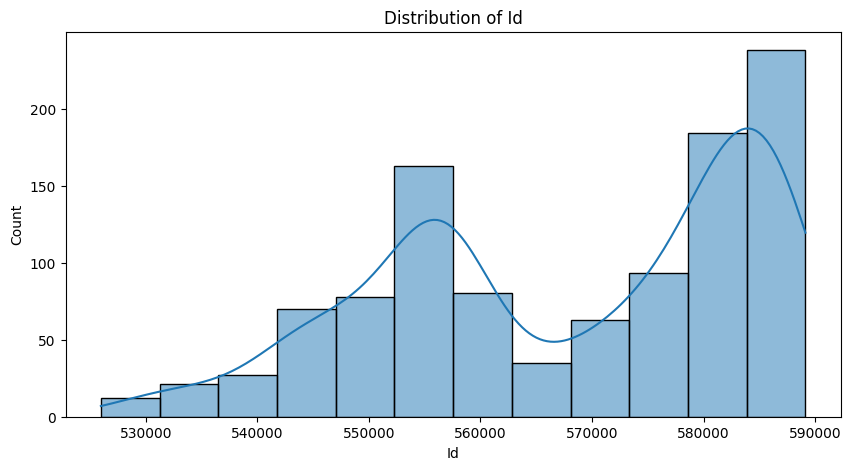

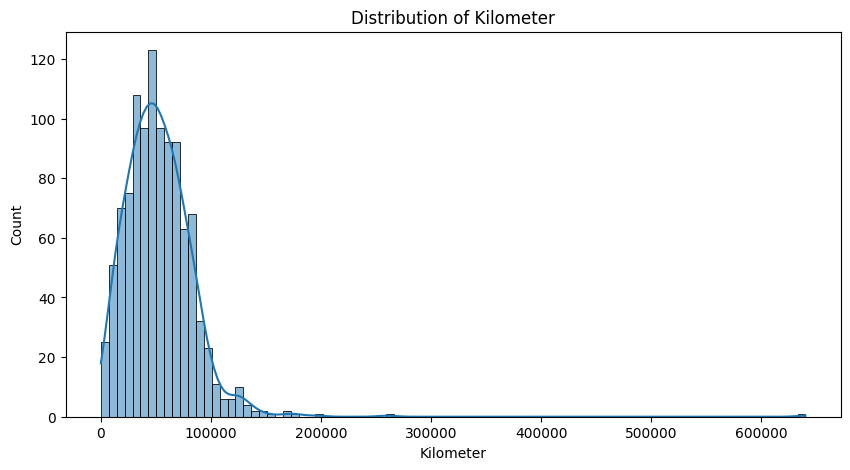

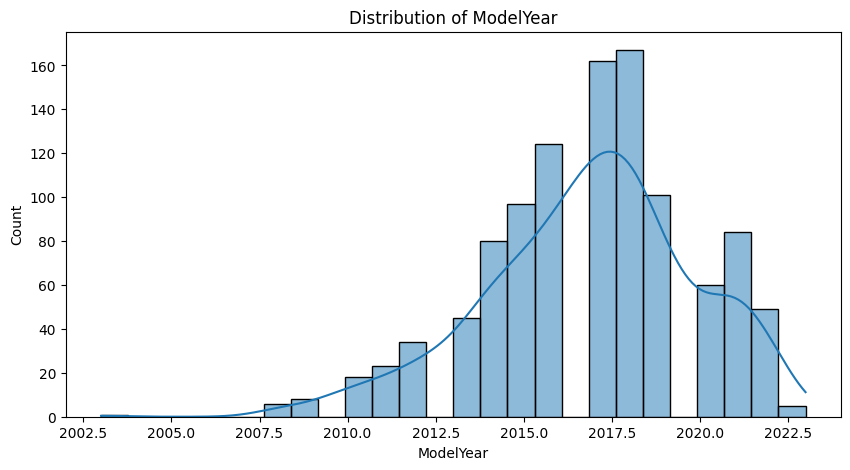

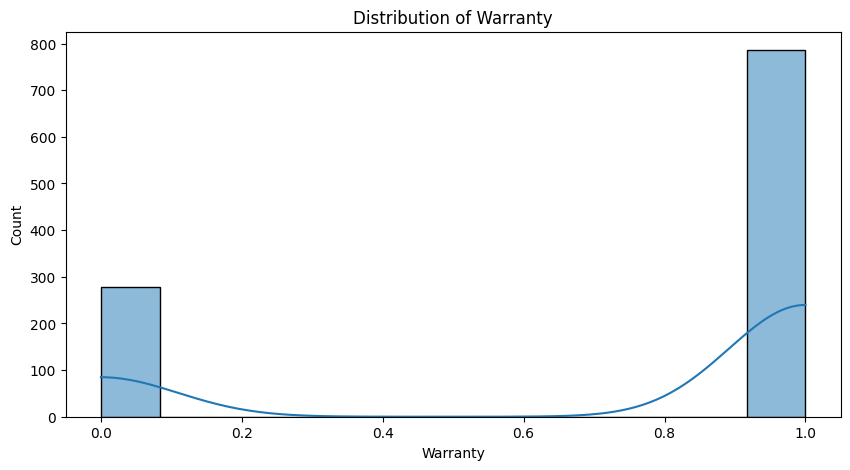

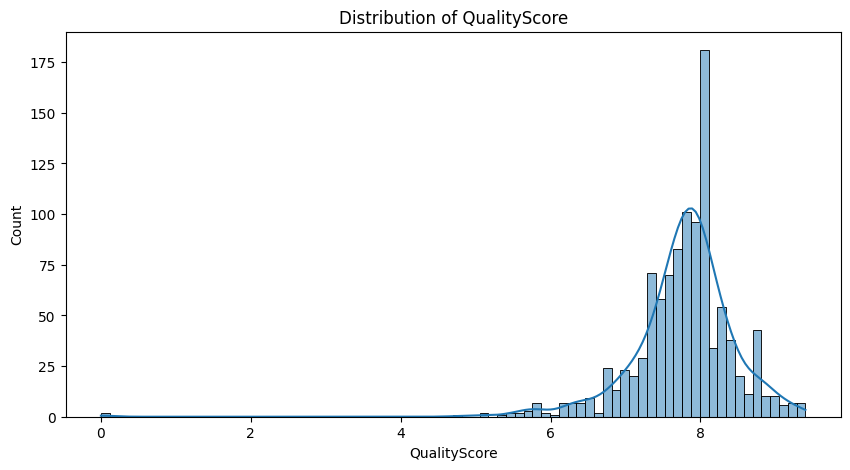

In [42]:
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical Feature Distribution

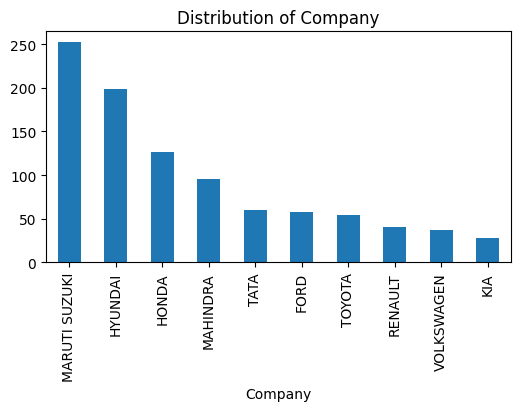

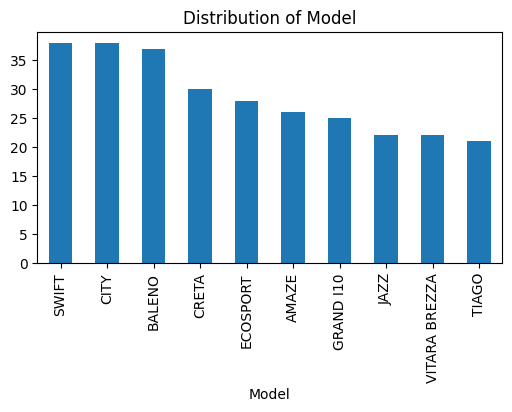

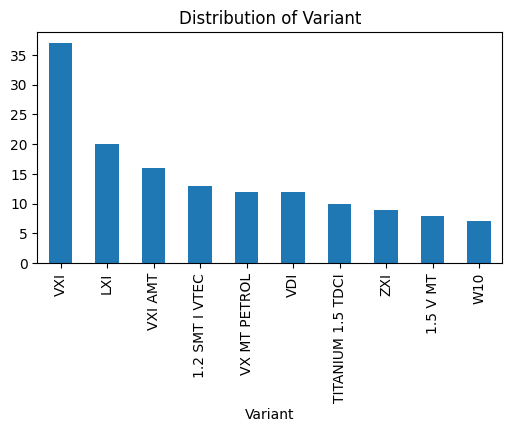

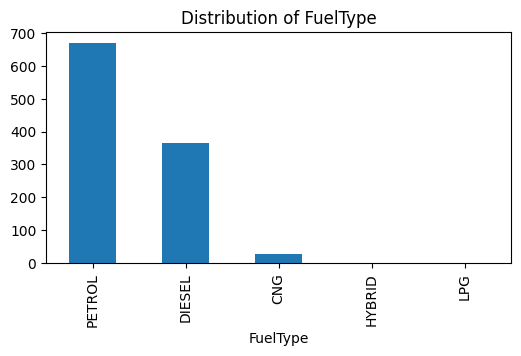

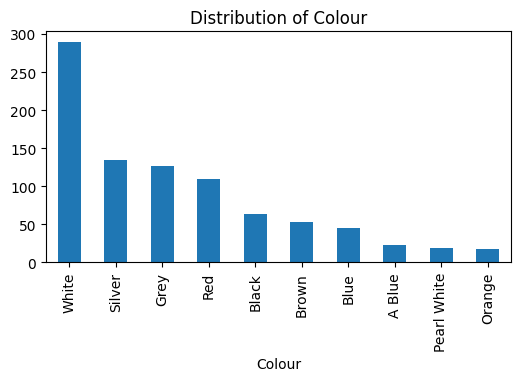

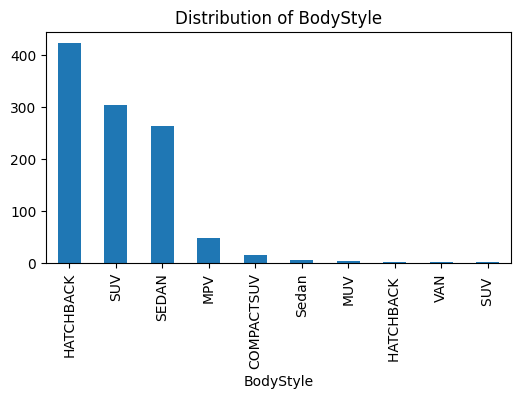

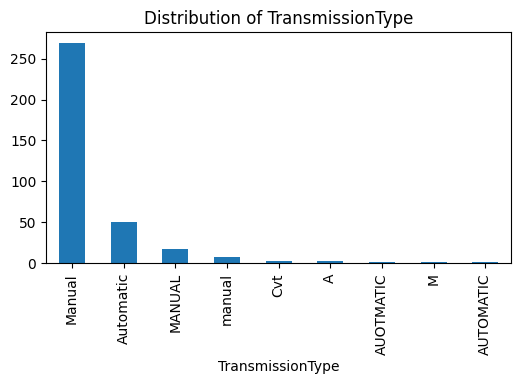

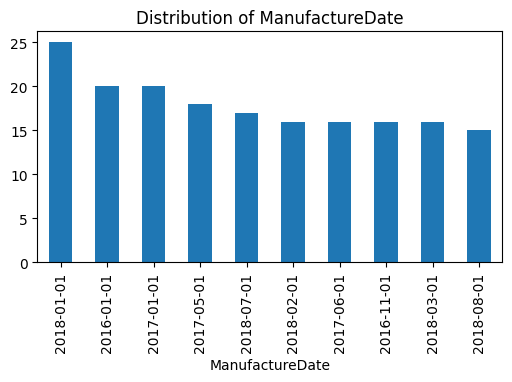

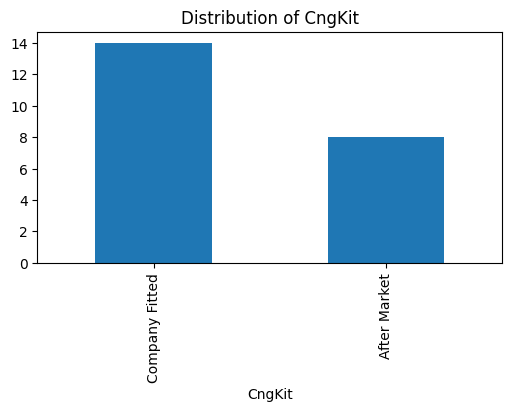

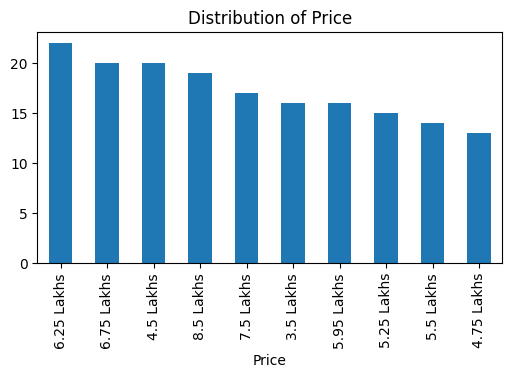

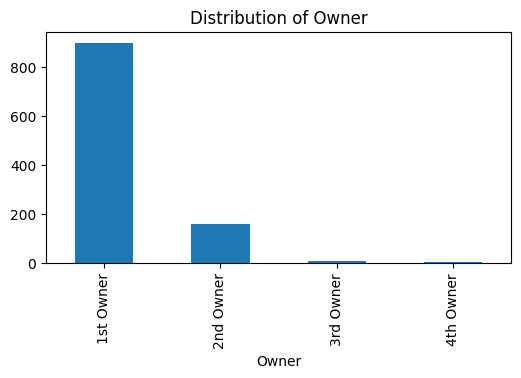

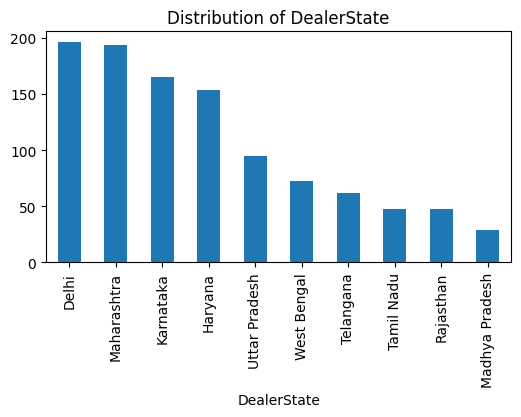

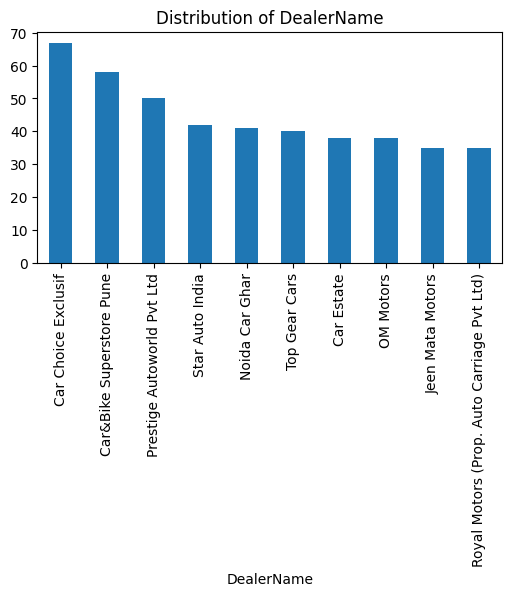

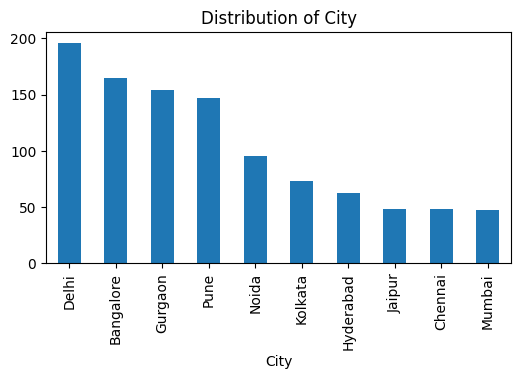

In [43]:
for col in cat_cols:
  plt.figure(figsize=(6,3))
  df[col].value_counts().head(10).plot(kind='bar')
  plt.title(f'Distribution of {col}')
  plt.show()

# Numerical Feature vs Price

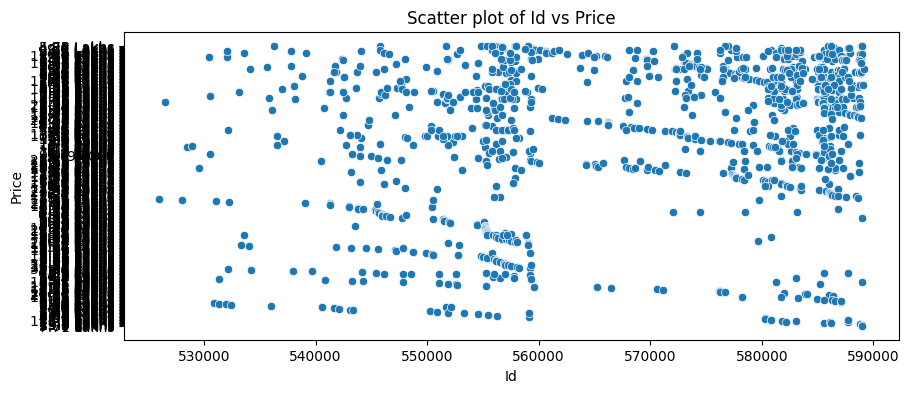

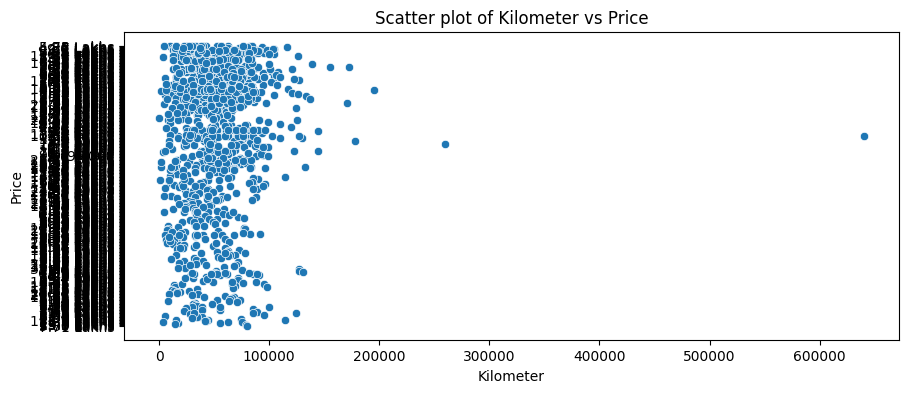

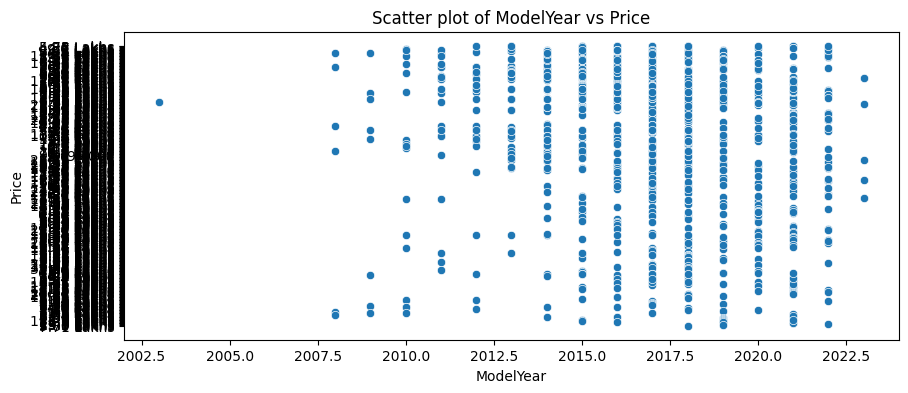

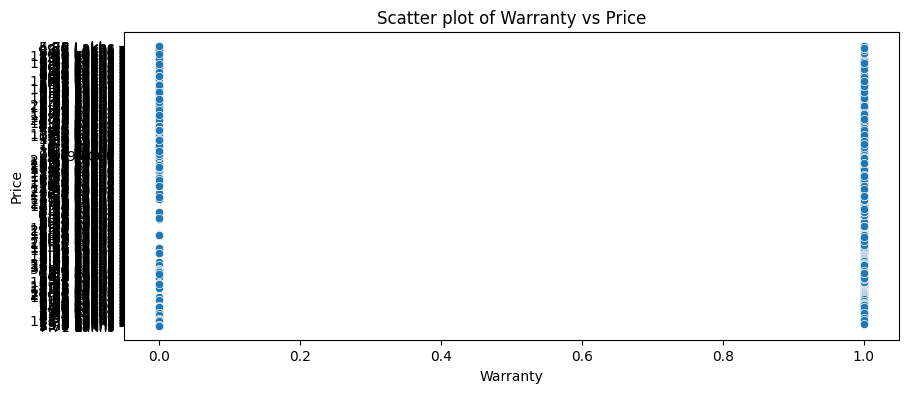

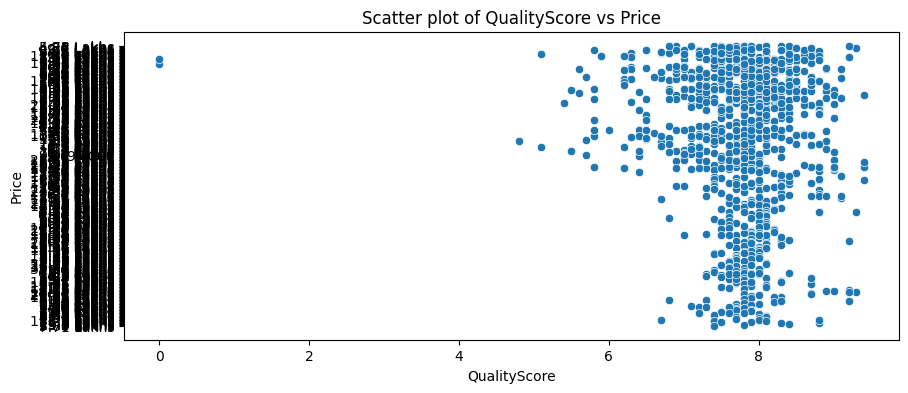

In [44]:
for col in num_cols:
  plt.figure(figsize=(10,4))
  sns.scatterplot(x=df[col], y=df['Price'])
  plt.title(f'Scatter plot of {col} vs Price')
  plt.show()

# Categorical Feature vs Price

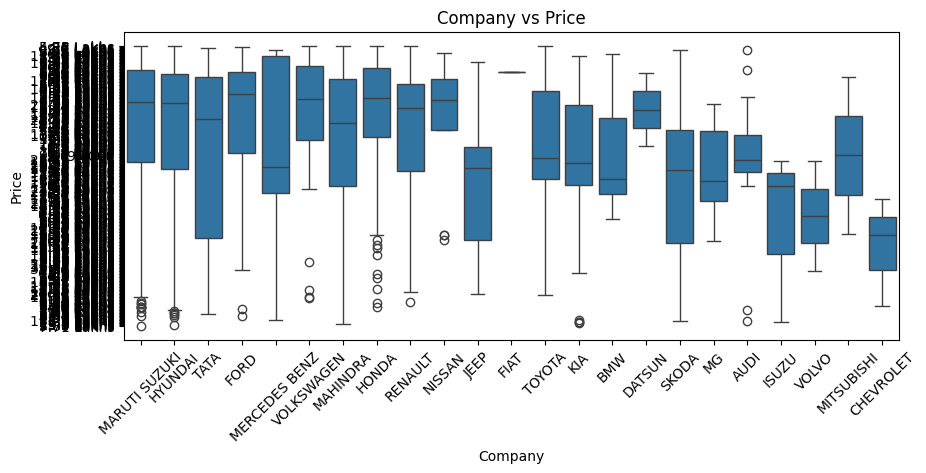

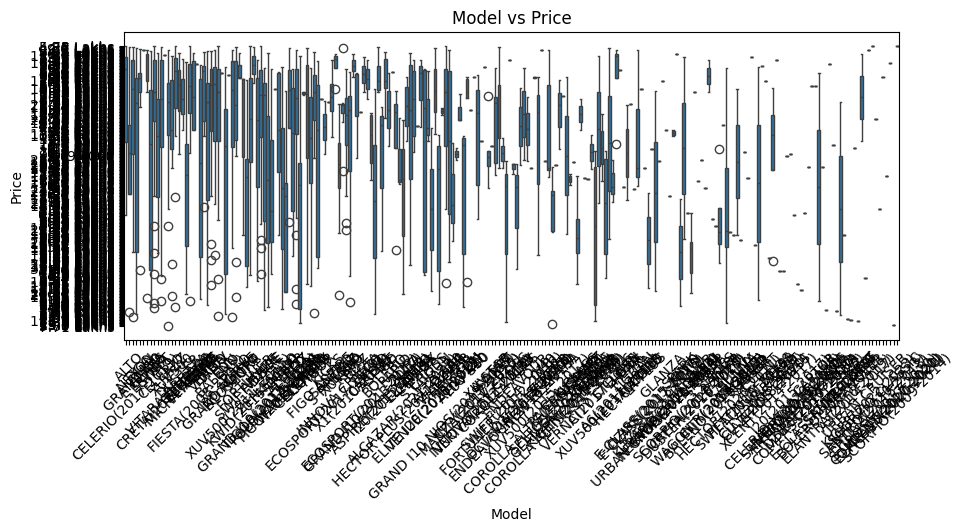

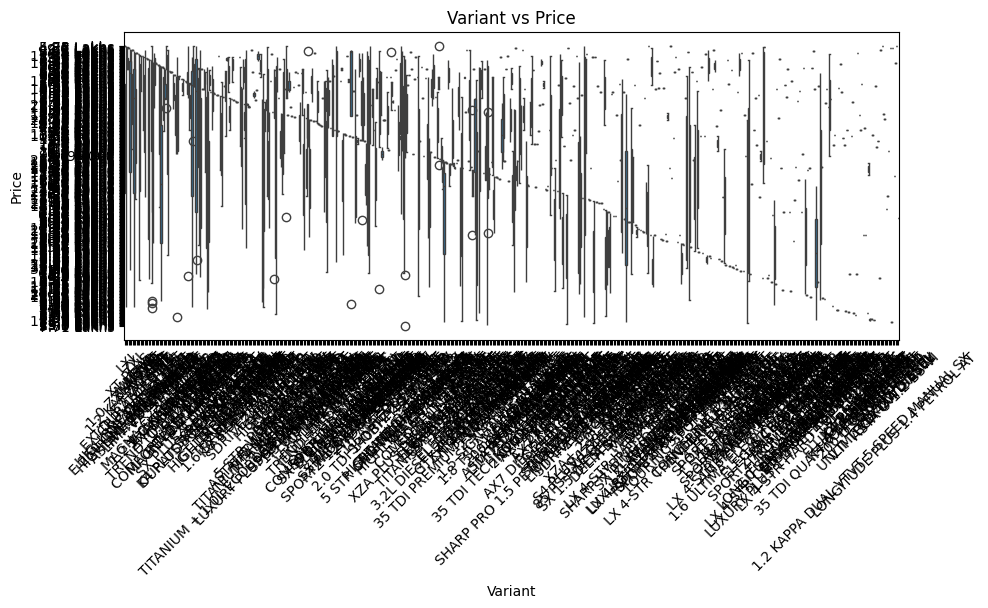

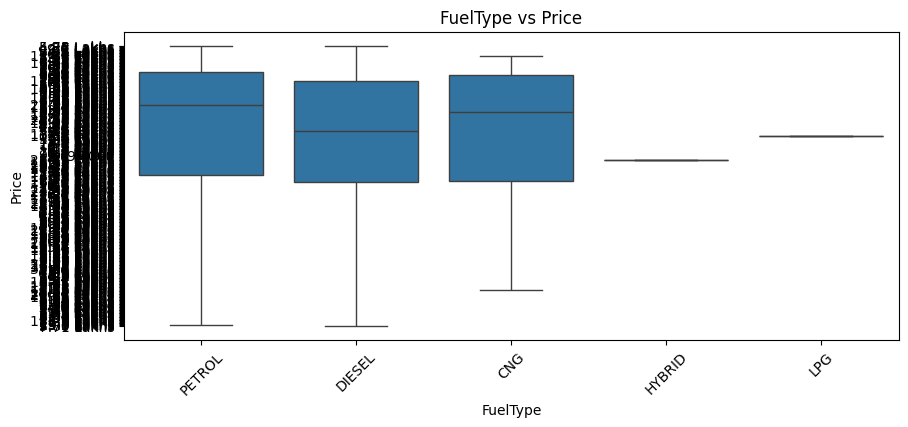

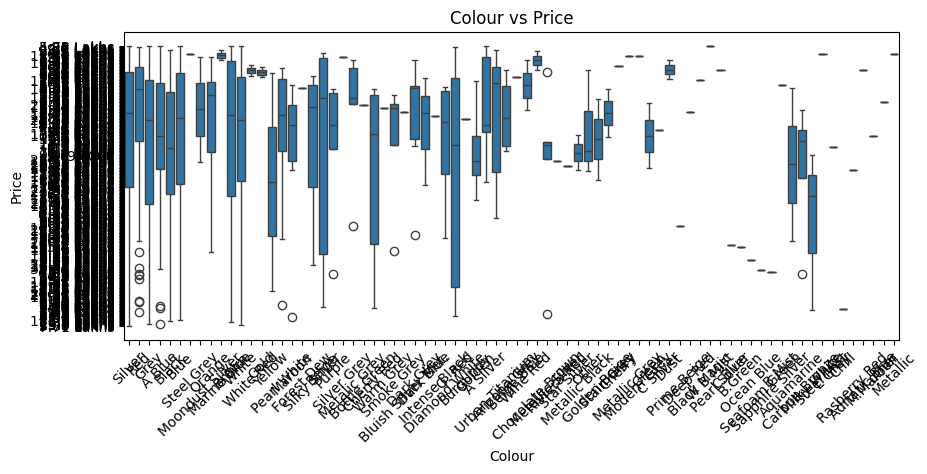

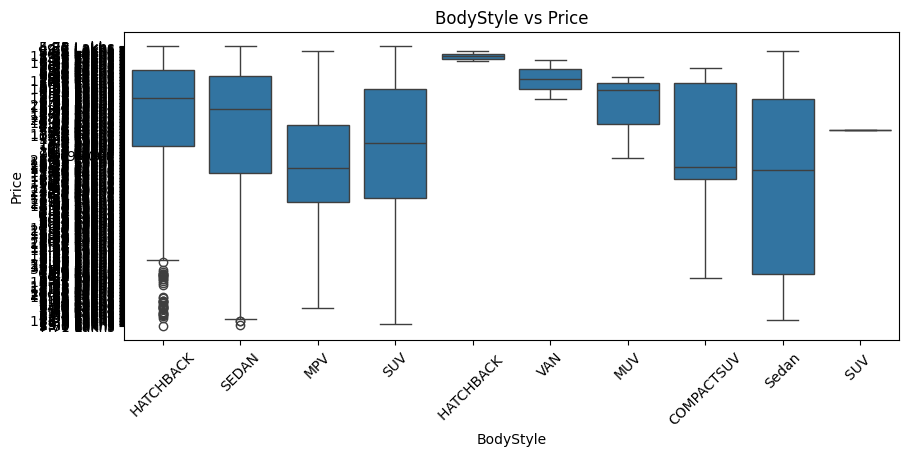

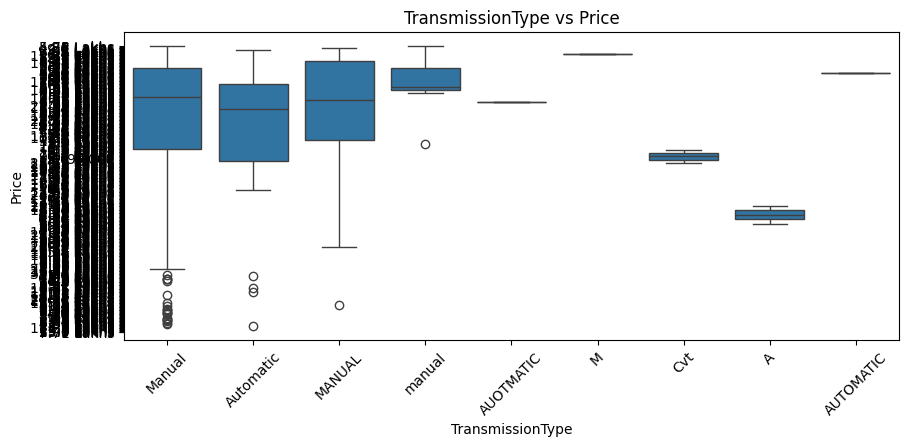

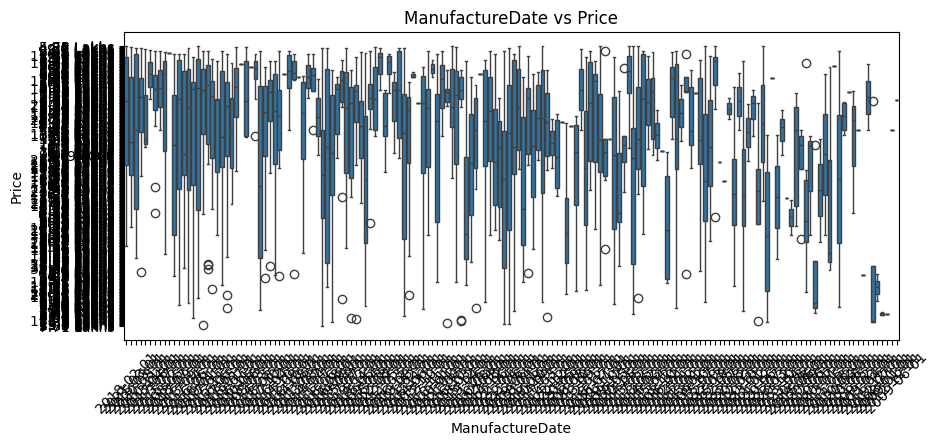

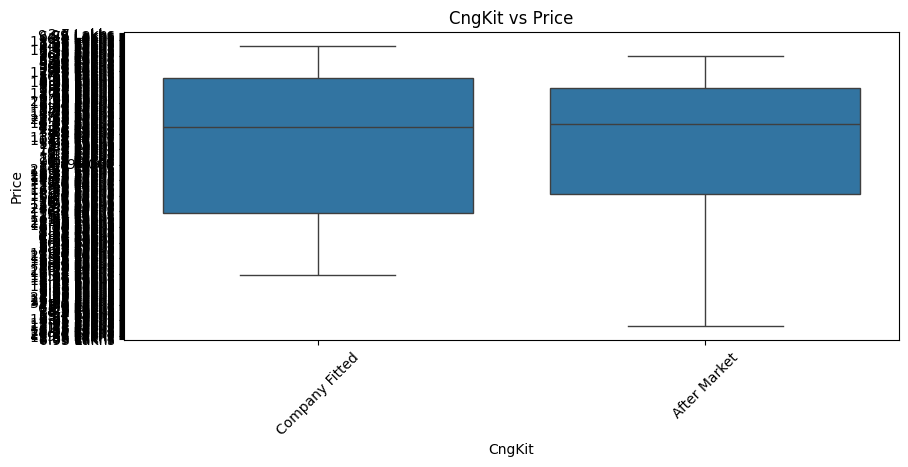

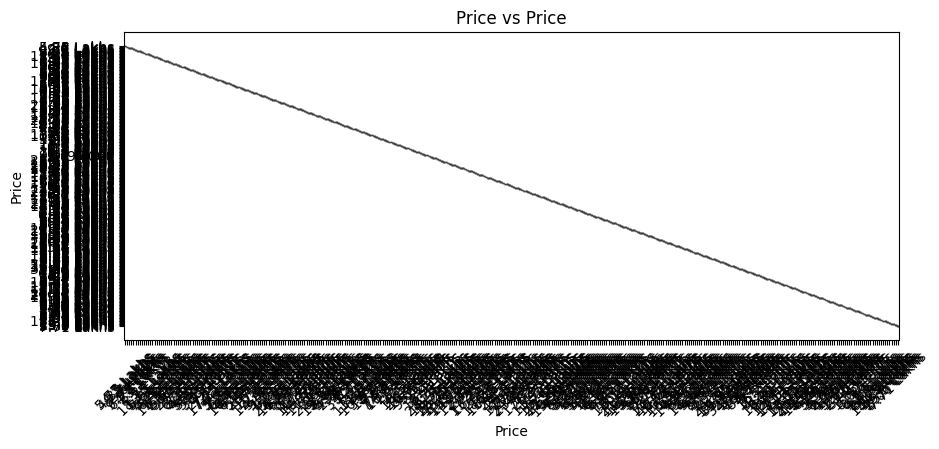

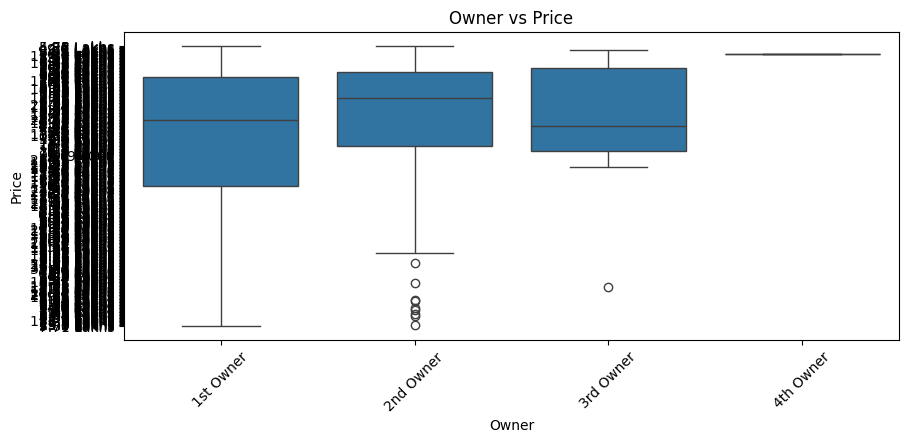

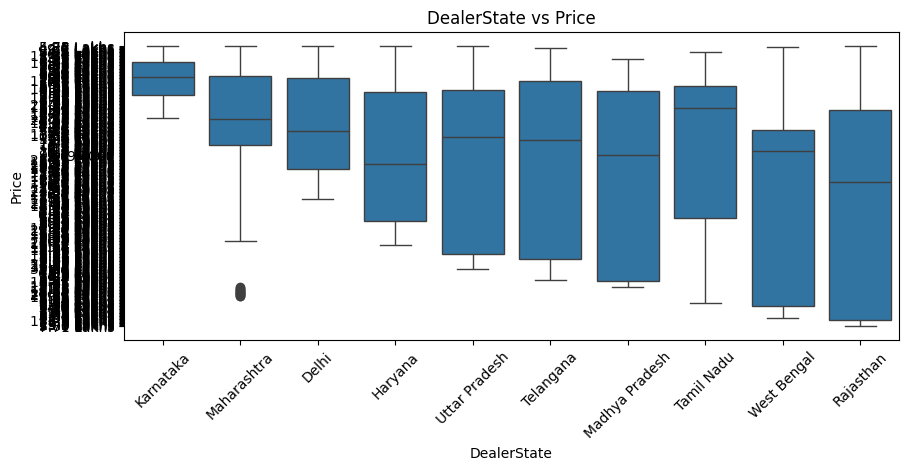

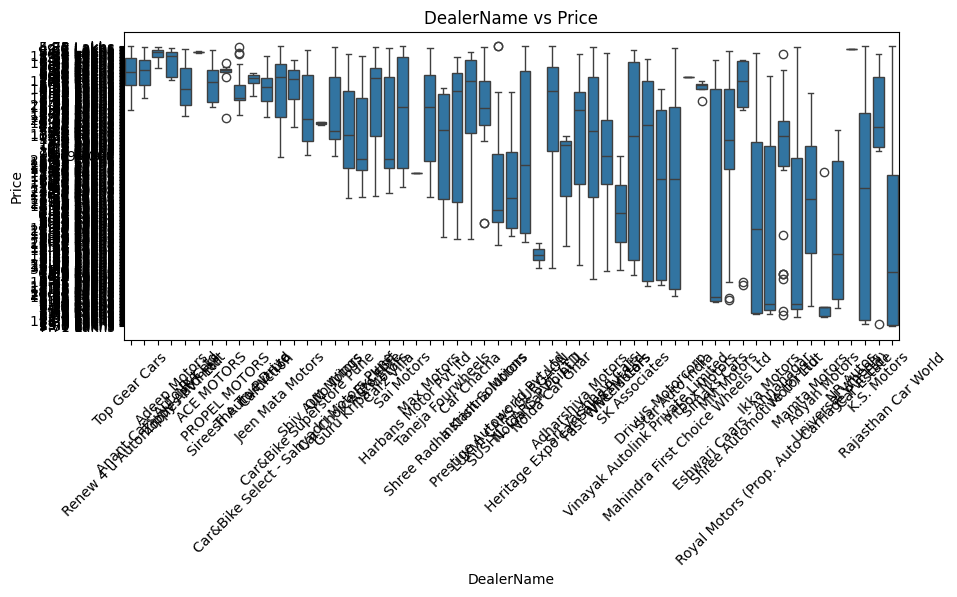

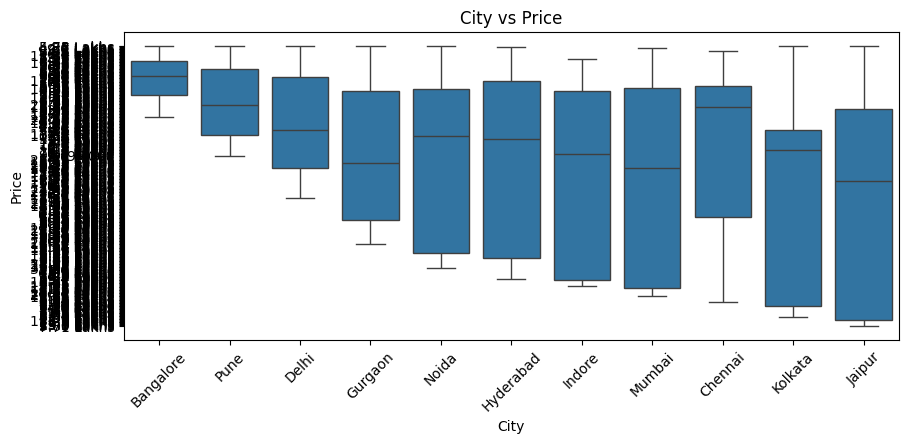

In [45]:
import warnings
warnings.filterwarnings("ignore", message=".*DejaVu Sans.*")

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col], y=df['Price'])
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Price")
    plt.show()

# Outlier Detection


In [46]:
df['Price_Numeric'] = df['Price'].str.replace(' Lakhs', '').str.replace(',', '').astype(float) * 100000

Q1 = df['Price_Numeric'].quantile(0.25)
Q3 = df['Price_Numeric'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Price_Numeric'] < Q1 - 1.5*IQR) | (df['Price_Numeric'] > Q3 + 1.5*IQR)]
outliers.shape

(85, 20)

In [47]:
df.groupby('FuelType')['Price_Numeric'].median().sort_values(ascending=False)

,Price_Numeric
FuelType,
HYBRID,1875000.0
DIESEL,899000.0
PETROL,595500.0
CNG,527500.0
LPG,350000.0


# Feature Engineering

- Create new features

In [48]:
#Car Age
from datetime import datetime

current_year = datetime.now().year
df['car_age'] = current_year - df['ModelYear']

In [49]:
#Price per kilometer
df['price_per_km'] = df['Price_Numeric'] / (df['Kilometer'] + 1)

- Encode Categorical Features

In [50]:
df_encoded = pd.get_dummies(
    df,
    columns=cat_cols,
    drop_first=True
)


- Split Features and Target

In [51]:
X = df_encoded.drop('Price_Numeric', axis=1)
y = df_encoded['Price_Numeric']

- Train a Model for Feature Importance Using Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X, y)


RandomForestRegressor(n_estimators=200, random_state=42)

In [53]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)


,0
price_per_km,0.450176
"Price_95,000",0.244999
ManufactureDate_2011-07-01,0.075000
Kilometer,0.060390
Price_85 Lakhs,0.038428
BodyStyle_HATCHBACK,0.032908
Variant_LXI BS IV,0.030000
FuelType_DIESEL,0.014535
Model_ALTO,0.010020
Model_FORTUNER,0.004955


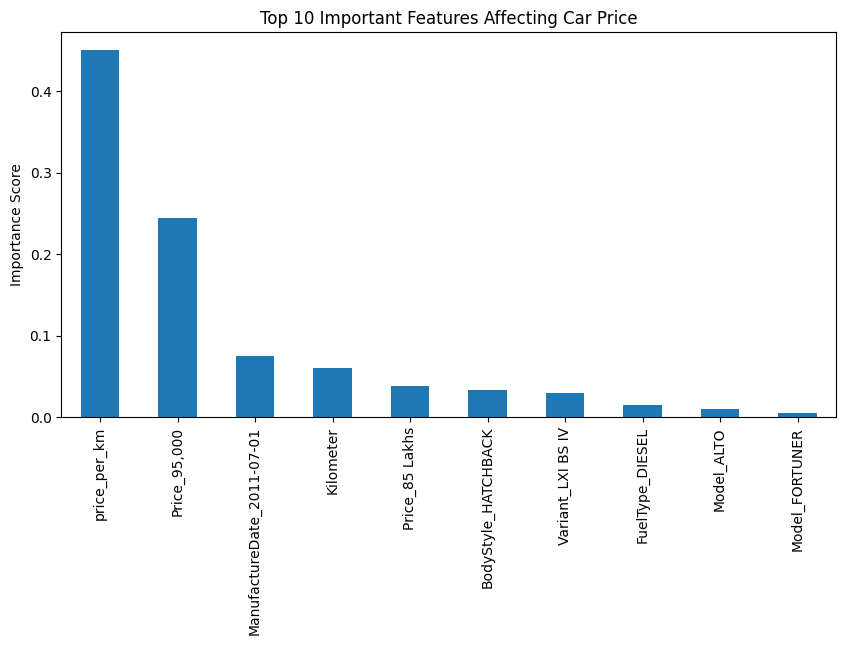

In [54]:
plt.figure(figsize=(10,5))
importances.head(10).plot(kind='bar')
plt.title("Top 10 Important Features Affecting Car Price")
plt.ylabel("Importance Score")
plt.show()


# Model Selection

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


- Define Evaluation Metrics

In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "R2 Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }


- Decision Tree Regressor

In [57]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=10,
    random_state=42
)

dt.fit(X_train, y_train)
dt_results = evaluate_model(dt, X_test, y_test)
dt_results


{'R2 Score': -0.268500100151678,
 'MAE': 134464.21603668912,
 'RMSE': np.float64(550890.0658598787)}

- Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
rf_results = evaluate_model(rf, X_test, y_test)
rf_results


{'R2 Score': -9962.681477285472,
 'MAE': 3421740.190639576,
 'RMSE': np.float64(48823578.27379023)}

- Model Comparison

In [59]:
comparison = pd.DataFrame(
    [dt_results, rf_results],
    index=["Decision Tree", "Random Forest"]
)

comparison


,R2 Score,MAE,RMSE
Decision Tree,-0.268500,1.344642e+05,5.508901e+05
Random Forest,-9962.681477,3.421740e+06,4.882358e+07


# Performance Evaluation

In [60]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mse, mae, rmse, r2
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.3f}")


Mean Squared Error (MSE): 2383741795456922.00
Root Mean Squared Error (RMSE): 48823578.27
Mean Absolute Error (MAE): 3421740.19
R² Score: -9962.681


In [61]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Model": name,
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

results = []
results.append(evaluate_model("Decision Tree", dt, X_test, y_test))
results.append(evaluate_model("Random Forest", rf, X_test, y_test))

pd.DataFrame(results)


,Model,MSE,MAE,R2 Score
0,Decision Tree,3.034799e+11,1.344642e+05,-0.268500
1,Random Forest,2.383742e+15,3.421740e+06,-9962.681477


# Visualization: Data Insights & Model Performance

# Data Insight Visualizations (EDA)
- Price Distribution

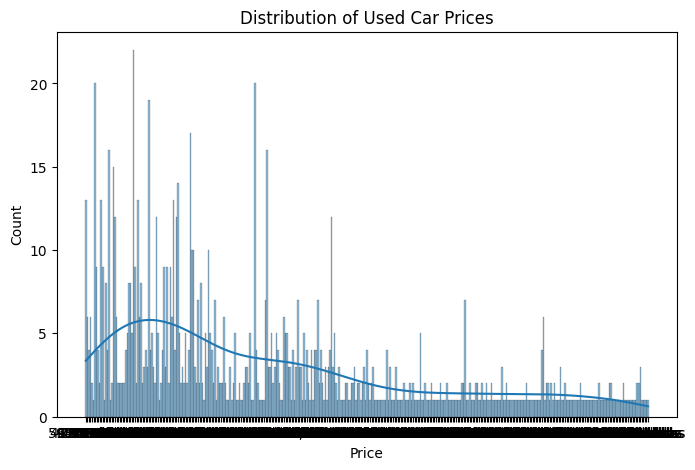

In [62]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribution of Used Car Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


- Price vs Manufacturing Year

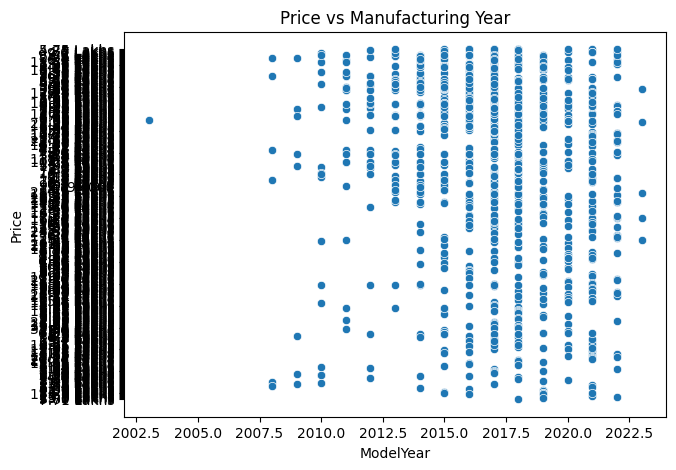

In [63]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='ModelYear', y='Price', data=df)
plt.title("Price vs Manufacturing Year")
plt.show()


- Price vs Mileage (KM Driven)

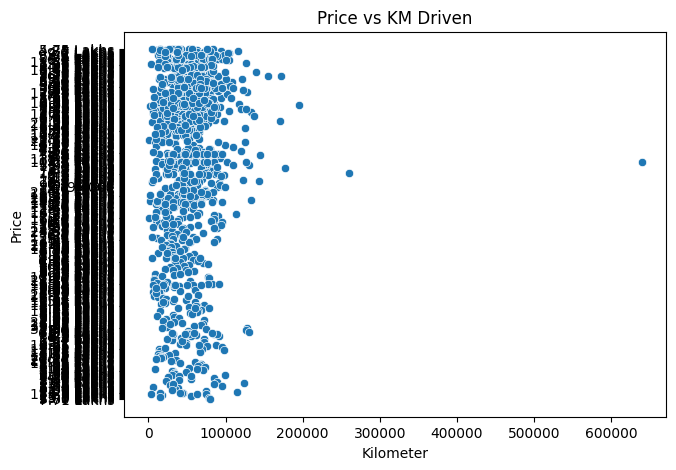

In [64]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Kilometer', y='Price', data=df)
plt.title("Price vs KM Driven")
plt.show()


- Price by Fuel Type

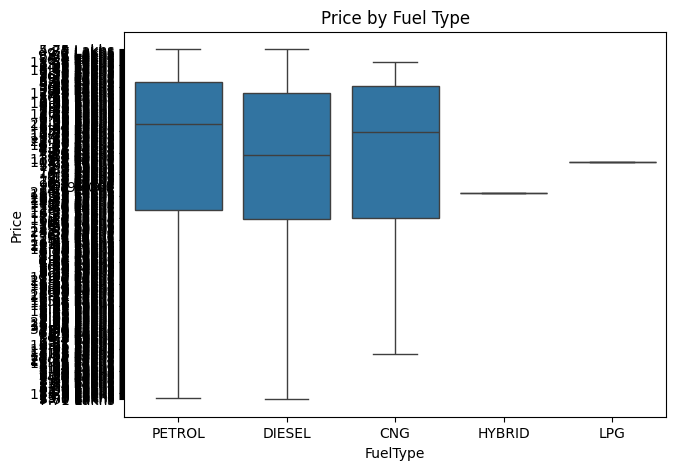

In [65]:
plt.figure(figsize=(7,5))
sns.boxplot(x='FuelType', y='Price', data=df)
plt.title("Price by Fuel Type")
plt.show()


- Price by Transmission Type

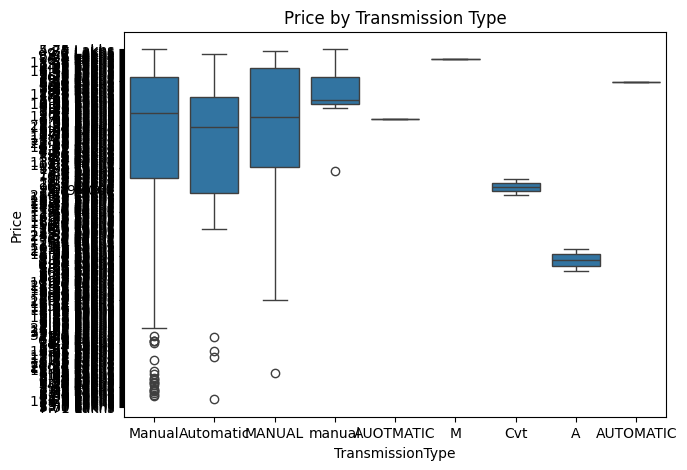

In [66]:
plt.figure(figsize=(7,5))
sns.boxplot(x='TransmissionType', y='Price', data=df)
plt.title("Price by Transmission Type")
plt.show()


- Correlation Heatmap

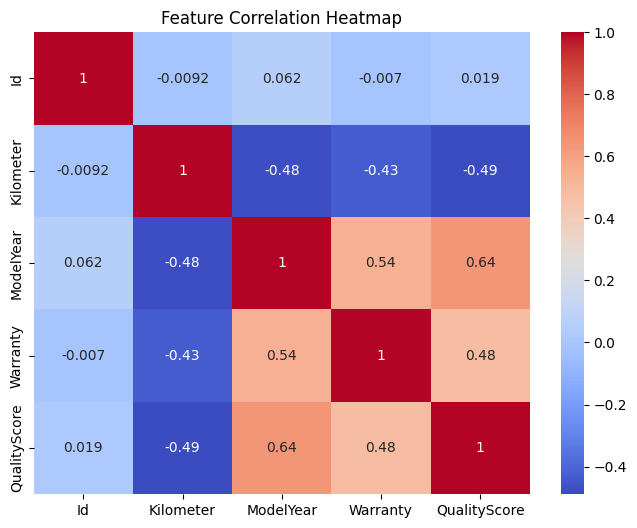

In [67]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# B.Model Performance Visualizations

- Actual vs Predicted Prices

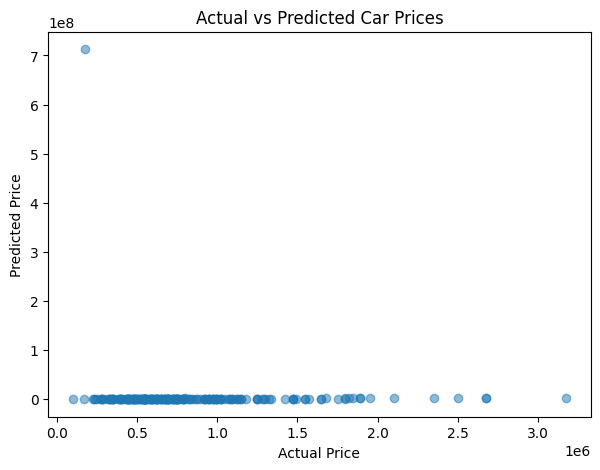

In [68]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


- Residual Distribution

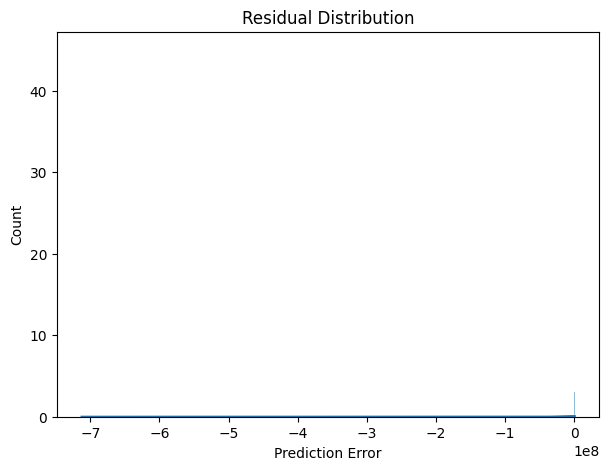

In [69]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.show()


- Residuals vs Predicted Values

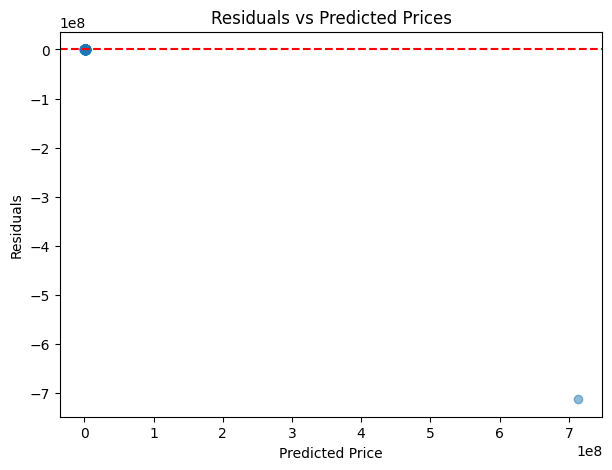

In [70]:
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Prices")
plt.show()
